# D√©tectez des faux billets - ONCFM

## Partie 1 - Inspection des donn√©es

Je commence par importer les librairies pandas, numpy, seaborn et matplotlib.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Premier tour

In [2]:
billets = pd.read_csv("billets.csv", sep=";")
billets.head(5)

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0        True    171.81       104.86        104.95        4.52       2.89   
1        True    171.46       103.36        103.66        3.77       2.99   
2        True    172.69       104.48        103.50        4.40       2.94   
3        True    171.36       103.91        103.94        3.62       3.01   
4        True    171.73       104.28        103.46        4.04       3.48   

   length  
0  112.83  
1  113.09  
2  113.16  
3  113.51  
4  112.54

In [3]:
billets.tail(5)

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
1495       False    171.75       104.38        104.17        4.42       3.09   
1496       False    172.19       104.63        104.44        5.27       3.37   
1497       False    171.80       104.01        104.12        5.51       3.36   
1498       False    172.06       104.28        104.06        5.17       3.46   
1499       False    171.47       104.15        103.82        4.63       3.37   

      length  
1495  111.28  
1496  110.97  
1497  111.95  
1498  112.25  
1499  112.07

In [4]:
billets.sample(5)

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
84          True    171.85       103.91        103.91        4.50       3.21   
972         True    171.40       103.88        103.54        3.75       2.80   
1449       False    171.66       104.10        104.15        4.53       3.40   
1224       False    171.74       104.52        104.23        5.59       3.61   
1499       False    171.47       104.15        103.82        4.63       3.37   

      length  
84    113.09  
972   113.01  
1449  111.83  
1224  112.14  
1499  112.07

Regardons la structure g√©n√©rale de notre fichier.

In [5]:
billets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [6]:
billets.nunique()

is_genuine        2
diagonal        159
height_left     155
height_right    170
margin_low      285
margin_up       123
length          336
dtype: int64

Regardons si nous avons des valeurs nulles et/ou dupliqu√©es.

In [7]:
billets.isna().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

In [8]:
billets.duplicated().sum()

0

### R√©gression lin√©aire multiple

Nous avons remarqu√© que certaines valeurs de la colonne margin_low sont manquantes. Je vais donc proc√©der √† une regression lin√©aire multiple pour compl√©ter ces valeurs manquantes.  
Je vais d'abord regarder si ces diff√©rents points sont v√©rifi√©s :  
 - nous avons une relation lin√©aire entre nos variables explicatives et la variable √† expliquer
 - les variables explicatives sont ind√©pendantes entre elles

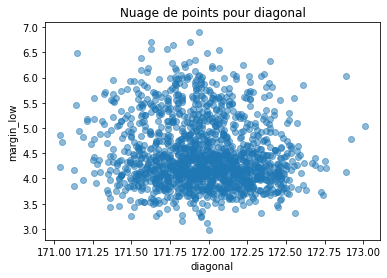

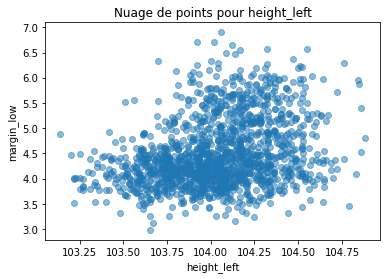

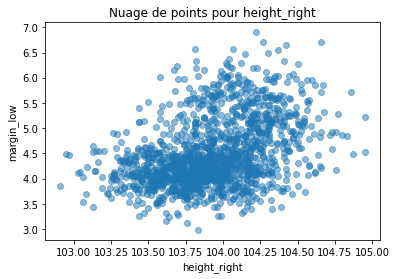

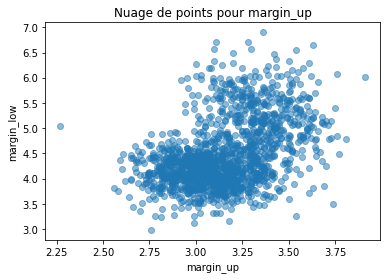

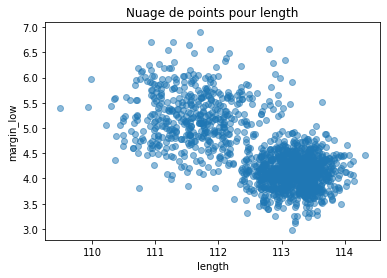

In [9]:
# Extraire les colonnes d'int√©r√™t
variables = ['diagonal', 'height_left', 'height_right', 'margin_up', 'length']
y_var = 'margin_low'

# Cr√©er les nuages de points
for col in variables:
    plt.scatter(billets[col], billets[y_var], alpha=0.5)
    plt.title('Nuage de points pour ' + col)
    plt.xlabel(col)
    plt.ylabel(y_var)
    plt.show()

Il ne semble pas y avoir de relation lin√©aire entre la variable √† expliquer et les diff√©rentes variables explicatives. Cependant je continue l'analyse.

<AxesSubplot:>

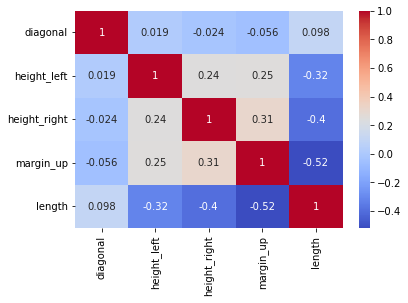

In [10]:
sns.heatmap(billets[['diagonal', 'height_left', 'height_right', 'margin_up', 'length']].corr(), annot=True, cmap='coolwarm')

Je consid√®re que la deuxi√®me condition est v√©rifi√©e, les variables explicatives sont ind√©pendantes entre elles. Je lance maintenant la r√©gression multiple, comme demand√©e, m√™me si les conditions n√©c√©ssaires ne sont pas remplies.

J'importe les librairies n√©cessaires pour la r√©gression lin√©aire multiple.

In [11]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import t, shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels

J'utilise la commande lm pour r√©gresser margin_low en fonction des autres variables de l'√©chantillon.

In [12]:
reg_multi = smf.ols('margin_low~diagonal+height_left+height_right+margin_up+length', data=billets).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     266.1
Date:                Wed, 10 May 2023   Prob (F-statistic):          2.60e-202
Time:                        20:28:57   Log-Likelihood:                -1001.3
No. Observations:                1463   AIC:                             2015.
Df Residuals:                    1457   BIC:                             2046.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       22.9948      9.656      2.382   

Le $R^{2}$ vaut environ 0.48, tout comme le $R^{2}$ ajust√©.  Cette faible valeur du $R^{2}$ signifie que le mod√®le ne parvient pas √† expliquer une grande partie de la variance des donn√©es. Autrement dit, les variables explicatives n'ont pas une forte influence sur la variable cible.

On remarque que tous les param√®tres sont significatifs. En effet, la p-valeur de tous les param√®tres est inf√©rieur √† 5 %. Nous les gardons donc tous pour le calcul des valeurs manquantes.

*J'utilise donc ce mod√®le pour compl√©ter les valeurs manquantes. Tout en sachant qu'il n'est probablement pas le plus pertinent*

In [13]:
billets['margin_low'] = billets['margin_low'].fillna(reg_multi.predict(billets))

In [14]:
billets.isna().sum()

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

### Analyser les r√©sultats de la r√©gression lin√©aire

Je vais v√©rifier la colin√©arit√© des variables, tester l‚Äôhomosc√©dasticit√© (c'est-√†-dire l'√©galit√© des variances) des r√©sidus et tester la normalit√© des r√©sidus.

In [15]:
# mesure de la collin√©arit√© des variables
variables_reg = reg_multi.model.exog
[variance_inflation_factor(variables_reg, i) for i in np.arange(1,variables_reg.shape[1])]

[1.0136128990686333,
 1.138260573608249,
 1.230114515556036,
 1.4044037781843624,
 1.576950145366581]

Ici, tous les coefficients sont inf√©rieurs √† 10, il n'y a donc pas de probl√®me de colin√©arit√©.

In [16]:
# test pour l'homosc√©dasticit√©
_, pval, __, f_pval = statsmodels.stats.diagnostic.het_breuschpagan(reg_multi.resid, variables_reg)
print('p value test Breusch Pagan:', pval)

p value test Breusch Pagan: 7.759535216217995e-16


La p-valeur ici est inf√©rieure √† 5 %, on rejette l'hypoth√®se nulle ùêª0. Donc il y a suffisamment de preuves pour affirmer que l'h√©t√©rosc√©dasticit√© est pr√©sente dans les donn√©es. Autrement dit on peut conclure qu'il n'y a pas d'√©galit√© des variances entre les √©chantillons test√©s.

In [17]:
# pour tester la normalit√© des r√©sidus, on peut faire un test de Shapiro-Wilk
shapiro(reg_multi.resid)

ShapiroResult(statistic=0.9857879281044006, pvalue=8.536943374437556e-11)

Ici, l'hypoth√®se de normalit√© est remise en cause (p-value = 8.53e-11 < 0.05).

### Inspection des donn√©es

In [18]:
billets.describe()

diagonal  height_left  height_right   margin_low    margin_up  \
count  1500.000000  1500.000000   1500.000000  1500.000000  1500.000000   
mean    171.958440   104.029533    103.920307     4.483475     3.151473   
std       0.305195     0.299462      0.325627     0.659632     0.231813   
min     171.040000   103.140000    102.820000     2.980000     2.270000   
25%     171.750000   103.820000    103.710000     4.020000     2.990000   
50%     171.960000   104.040000    103.920000     4.310000     3.140000   
75%     172.170000   104.230000    104.150000     4.870000     3.310000   
max     173.010000   104.880000    104.950000     6.900000     3.910000   

           length  
count  1500.00000  
mean    112.67850  
std       0.87273  
min     109.49000  
25%     112.03000  
50%     112.96000  
75%     113.34000  
max     114.44000

Apres cette analyse rapide, a l'aide de la methode describe, on ne remarque pas de valeurs aberrantes.

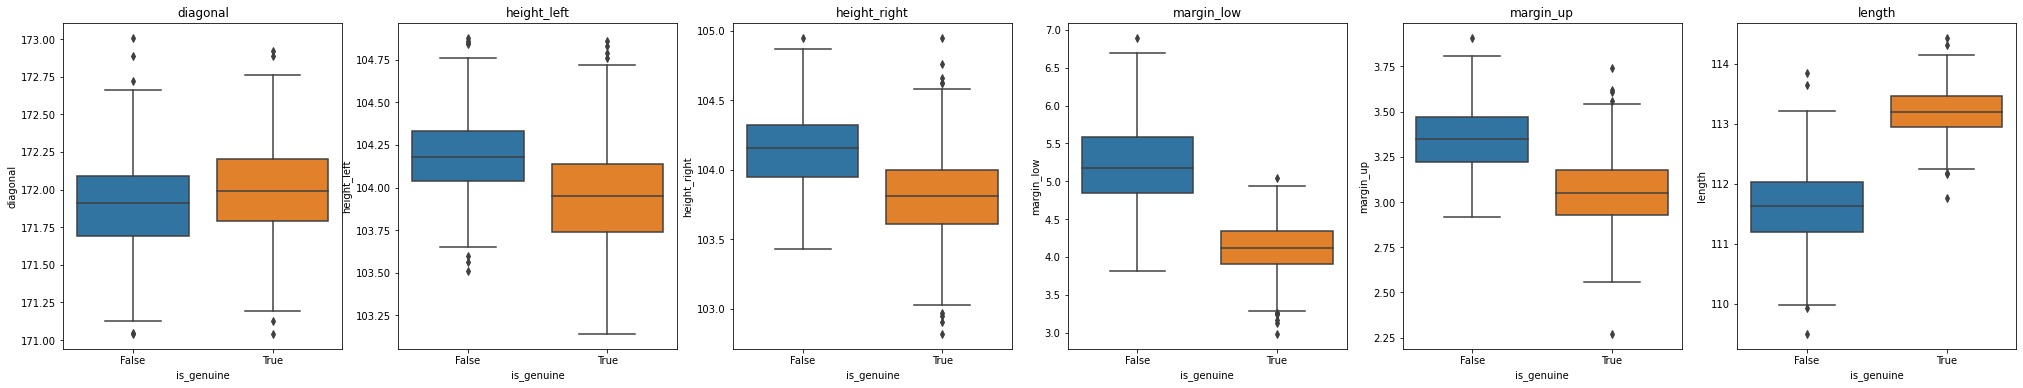

In [19]:
# Cr√©er un subplot pour chaque variable
fig, axs = plt.subplots(ncols=6, figsize=(35,6))

# Boucler sur chaque variable pour tracer les boxplots
for i, col in enumerate(billets.columns[1:]):
    sns.boxplot(x='is_genuine', y=col, data=billets, ax=axs[i])
    axs[i].set_title(col)

# Afficher le graphique
plt.show()

En moyenne on observe que les faux billets sont plus haut √† gauche et √† droite, ont une marge basse et haute plus √©lev√©e. En revanche leur diagonale et leur longueur est plus faible que les vrais billets.

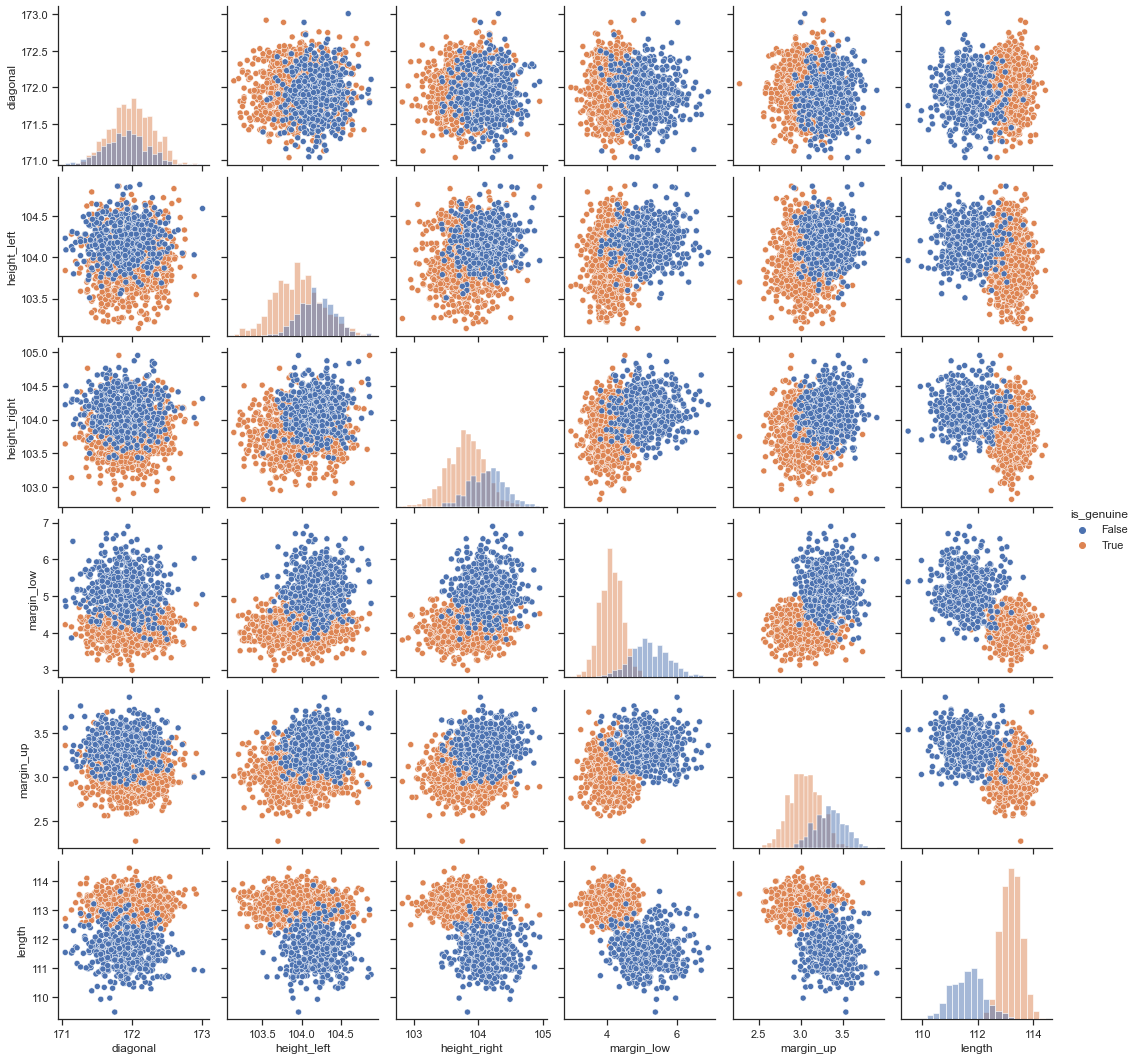

In [20]:
sns.set(style="ticks")

# Cr√©er le pairplot en utilisant la variable bool√©enne 'is_genuine' pour la couleur
sns.pairplot(billets, hue='is_genuine', diag_kind='hist')

# Afficher le graphique
plt.show()

A l'aide du pairplot, on remarque que les liens n√©gatifs les plus forts sont entre margin_up, margin_low et lenght. Comme cela est confirm√© par le heatmap ci dessous.

<AxesSubplot:>

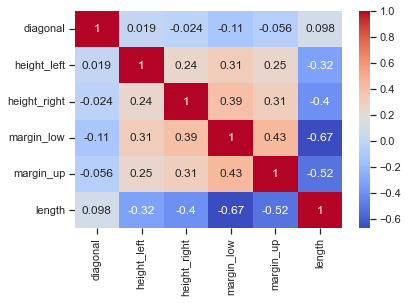

In [21]:
sns.heatmap(billets[['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']].corr(), annot=True, cmap='coolwarm')

## Partie 2 - Analyse en composante principale

Comme nous allons utiliser la m√©thodes des kmeans comme mod√®le pr√©dictif je vais r√©aliser une ACP (ou r√©duction des variables) pour afficher la classification sur le premier plan factoriel.

In [22]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [23]:
#j'enl√®ve la premi√®re colonne
n_billets = billets.drop(billets.columns[0], axis=1)

matrice = n_billets.values
matrice[:5]

array([[171.81, 104.86, 104.95,   4.52,   2.89, 112.83],
       [171.46, 103.36, 103.66,   3.77,   2.99, 113.09],
       [172.69, 104.48, 103.5 ,   4.4 ,   2.94, 113.16],
       [171.36, 103.91, 103.94,   3.62,   3.01, 113.51],
       [171.73, 104.28, 103.46,   4.04,   3.48, 112.54]])

In [24]:
features = n_billets.columns
features

Index(['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up',
       'length'],
      dtype='object')

In [25]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(matrice)

In [26]:
idx = ["mean", "std"]

pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

0    1    2    3    4    5
mean -0.0  0.0 -0.0  0.0 -0.0  0.0
std   1.0  1.0  1.0  1.0  1.0  1.0

In [27]:
n_components = 6
pca = PCA(n_components=n_components)
pca.fit(X_scaled)

PCA(n_components=6)

In [28]:
pca.explained_variance_ratio_

array([0.43288253, 0.16956616, 0.13025062, 0.11824871, 0.09602704,
       0.05302493])

In [29]:
scree = (pca.explained_variance_ratio_*100).round(2)
scree_cum = scree.cumsum().round()
scree_cum
x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3, 4, 5, 6]

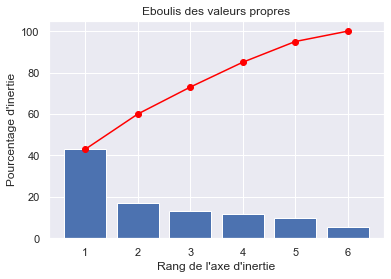

In [30]:
sns.set()
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("Rang de l'axe d'inertie")
plt.ylabel("Pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

Avec l'eboulis des valeurs propres on voit que deux composantes expliquent 65% de la variabilite de nos donnees.

In [31]:
pcs = pca.components_
pcs = pd.DataFrame(pcs)
pcs

0         1         2         3         4         5
0 -0.084698  0.330634  0.393555  0.507693  0.439415 -0.527052
1  0.941304  0.307528  0.108332 -0.072440 -0.004954  0.048636
2 -0.287843  0.885049 -0.163563 -0.109046 -0.270112  0.149099
3 -0.101961 -0.049244  0.866562 -0.089271 -0.444047  0.176360
4 -0.115992  0.101652  0.235998 -0.564088  0.711988  0.308863
5  0.008341  0.006130  0.001091  0.631621  0.172701  0.755725

In [32]:
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

diagonal  height_left  height_right  margin_low  margin_up  length
F1     -0.08         0.33          0.39        0.51       0.44   -0.53
F2      0.94         0.31          0.11       -0.07      -0.00    0.05
F3     -0.29         0.89         -0.16       -0.11      -0.27    0.15
F4     -0.10        -0.05          0.87       -0.09      -0.44    0.18
F5     -0.12         0.10          0.24       -0.56       0.71    0.31
F6      0.01         0.01          0.00        0.63       0.17    0.76

<AxesSubplot:>

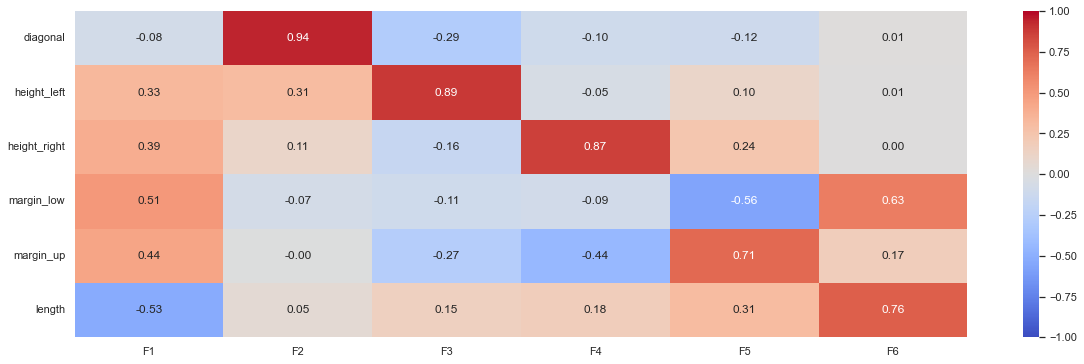

In [33]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

Ci dessus on peut voir sur la heatmap que diagonal est fortement correle avec la composante F2. Alors que margin_low et margin_up sont positivement correle avec la composante F1, lenght etant correle negativement avec F1.

In [34]:
def correlation_graph(pca, 
                      x_y, 
                      features) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a √©t√© fit
    x_y : list ou tuple : le couple x,y des plans √† afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) √† repr√©senter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les fl√®ches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqu√©
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    # J'ai copi√© coll√© le code sans le lire
    plt.title("Cercle des corr√©lations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

Cela est confirme avec le cercle des correlations sur F1 et F2 ci dessous.

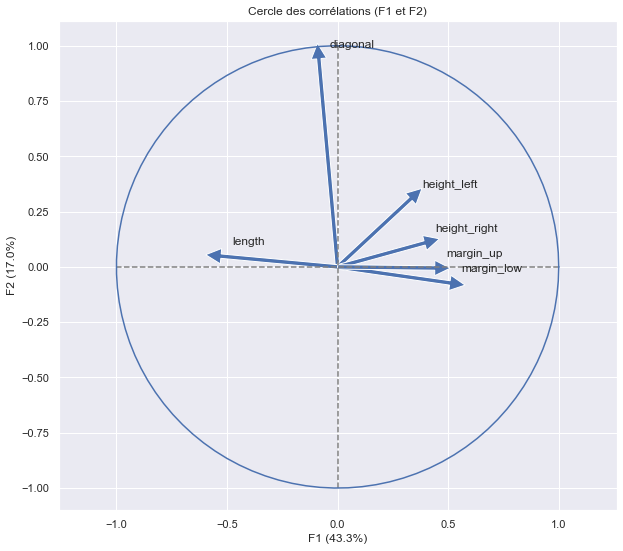

In [35]:
correlation_graph(pca, (0,1), features)

In [36]:
X_proj = pca.transform(X_scaled)
X_proj[:5]

array([[ 1.64413533,  0.74784336,  2.40251671,  3.18085156,  0.30398483,
        -0.01224666],
       [-2.01990995, -2.20749245, -1.00186403,  0.07293664,  0.03333482,
        -0.47550345],
       [-0.969864  ,  2.62049228,  1.19536388, -0.92362716, -0.83774922,
         0.2073435 ],
       [-1.37746195, -1.8183704 ,  0.6511098 ,  0.82815499,  0.79956344,
        -0.23099664],
       [ 0.14871192, -0.56672188,  0.85404268, -1.78771257,  1.17788283,
        -0.30258119]])

In [37]:
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None,
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projet√©s
    x_y : list ou tuple : le couple x,y des plans √† afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a √©t√© fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus √† projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : param√®tre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui d√©finit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilis√© pour repr√©senter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On d√©finit la forme de la figure si elle n'a pas √©t√© donn√©e
    if not figsize: 
        figsize = (7,6)

    # On g√®re les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On v√©rifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demand√©es")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on d√©finit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On v√©rifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha, 
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c, palette="Set1")

    # Si la variable pca a √©t√© fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqu√©
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        # j'ai copi√© coll√© la fonction sans la lire
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()

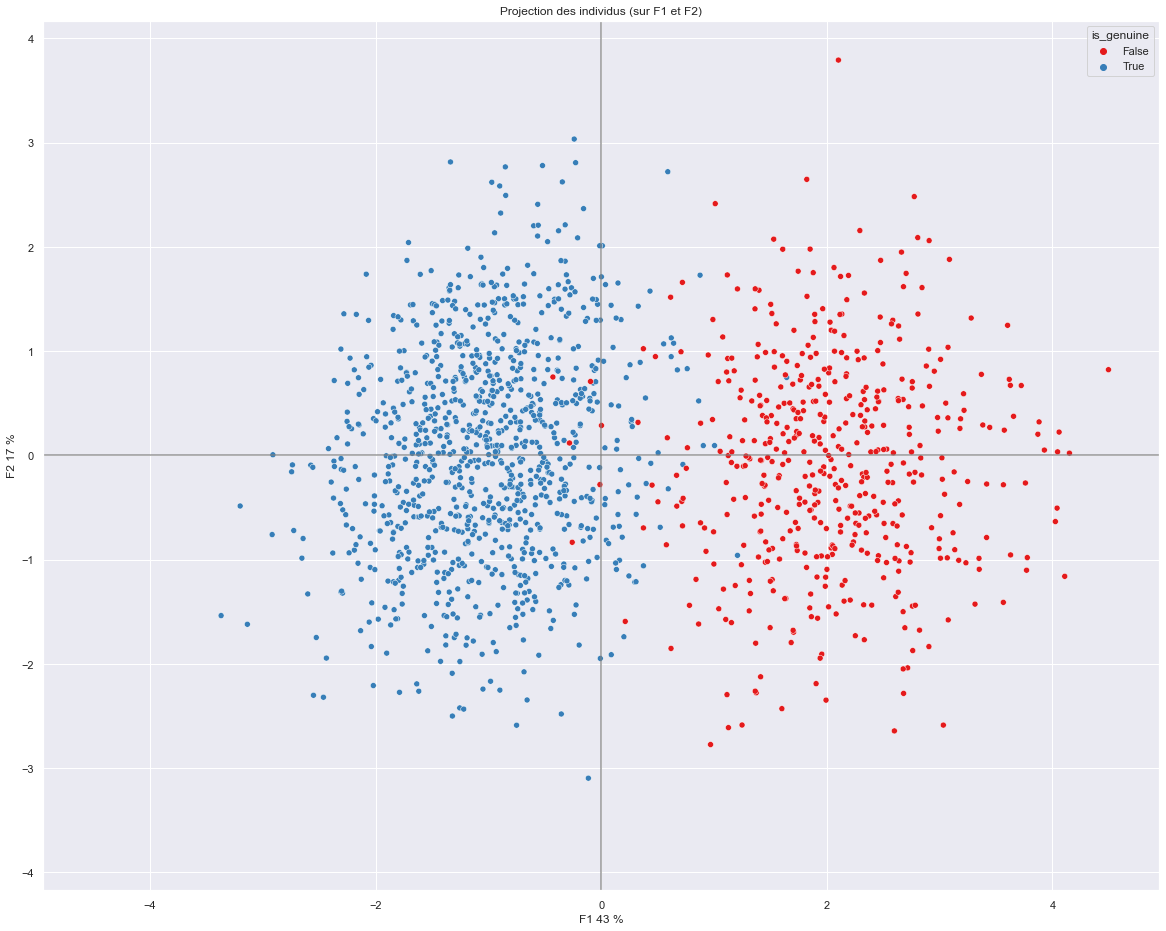

In [38]:
x_y = [0,1]
display_factorial_planes(X_proj, x_y, pca, labels=None, clusters=billets["is_genuine"], figsize=(20,16), marker="o")

La projection des individus (billets) sur le premier plan factoriel F1 et F2 nous montre deux groupes assez distincts qui correspondent au billets True ou False.

## Partie 3 - Mod√©lisation

### Inspection des donn√©es de la target (is_geniune)

In [39]:
billets.iloc[:,0].value_counts()

True     1000
False     500
Name: is_genuine, dtype: int64

In [40]:
billets.iloc[:,0].value_counts(normalize=True).round(2)

True     0.67
False    0.33
Name: is_genuine, dtype: float64

<AxesSubplot:ylabel='is_genuine'>

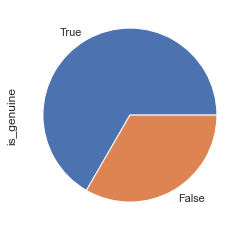

In [41]:
billets.iloc[:,0].value_counts().plot(kind="pie")

### Pr√©paration des donn√©es

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, confusion_matrix
# estimateurs
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression

In [43]:
billets.head()

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0        True    171.81       104.86        104.95        4.52       2.89   
1        True    171.46       103.36        103.66        3.77       2.99   
2        True    172.69       104.48        103.50        4.40       2.94   
3        True    171.36       103.91        103.94        3.62       3.01   
4        True    171.73       104.28        103.46        4.04       3.48   

   length  
0  112.83  
1  113.09  
2  113.16  
3  113.51  
4  112.54

In [44]:
X = billets.drop(columns='is_genuine')
y = billets.is_genuine

In [45]:
X.head()

diagonal  height_left  height_right  margin_low  margin_up  length
0    171.81       104.86        104.95        4.52       2.89  112.83
1    171.46       103.36        103.66        3.77       2.99  113.09
2    172.69       104.48        103.50        4.40       2.94  113.16
3    171.36       103.91        103.94        3.62       3.01  113.51
4    171.73       104.28        103.46        4.04       3.48  112.54

In [46]:
y.head()

0    True
1    True
2    True
3    True
4    True
Name: is_genuine, dtype: bool

Apres la preparation des donnees je commence par entrainer un modele de classificateur aleatoire. Pour pouvoir comparer ses resultats avec un modele de regression logistique par la suite et avec un modele predictif kmeans pour terminer. Ensuite nous pourrons determiner lequel de ces modeles est le plus performant.

### Test train split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=42)

In [48]:
print(f"Nous avons X_train de forme {X_train.shape} et y_train de forme {y_train.shape} ")
print(f"Nous avons X_test de forme {X_test.shape} et y_test de forme {y_test.shape} ")

Nous avons X_train de forme (1050, 6) et y_train de forme (1050,) 
Nous avons X_test de forme (450, 6) et y_test de forme (450,) 


## - Dummy Classifier

J'utilise le DummyClassifier pour donner une id√©e du score de base que l'algorithme le plus simple obtiendrait en faisant des pr√©dictions. 

In [49]:
estimator = DummyClassifier(strategy="most_frequent")
estimator.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

In [50]:
y_pred = estimator.predict(X_test)
y_pred

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [51]:
pd.Series(y_pred).value_counts()

True    450
dtype: int64

In [52]:
y_test.value_counts(normalize=True)

True     0.642222
False    0.357778
Name: is_genuine, dtype: float64

Je cree une fonction score pour calculer le score de l'estimateur (DummyClassifier ou R√©gression logistique dans notre exemple)

In [53]:
def score(estimator):
    """Calcul et pr√©sente le train score et le test score"""
    
    tr_score = estimator.score(X_train, y_train).round(3)
    te_score = estimator.score(X_test, y_test).round(3)
    
    print(f"Score train : {tr_score} \nScore test : {te_score}")

In [54]:
score(estimator)

Score train : 0.677 
Score test : 0.642


Je cree une fonction pour afficher la matrice de confusion.

In [55]:
def confusion(y_test, y_pred):
    """Pour une matrice de confusion plus jolie"""
    mat = confusion_matrix(y_test, y_pred)
    mat = pd.DataFrame(mat)
    mat.columns = [f"pred_{i}" for i in mat.columns]
    mat.index = [f"test_{i}" for i in mat.index]

    # Remplacer pred_0 par pred_False et pred_1 par pred_True (idem pour test)
    mat.columns = ['pred_False' if col == 'pred_0' else 'pred_True' for col in mat.columns]
    mat.index = ['test_False' if idx == 'test_0' else 'test_True' for idx in mat.index]

    return mat

In [56]:
confusion(y_test, y_pred)

pred_False  pred_True
test_False           0        161
test_True            0        289

Ici on voit que le premier modele aleatoire a pris la donnee la plus repandue (True) et a retourne a chaque fois ce resultat. On obtient un score de 0.64.

## - R√©gression Logistique

In [57]:
estimator = LogisticRegression(solver="liblinear")
estimator.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [58]:
y_pred = estimator.predict(X_test)
y_pred

array([False, False,  True,  True,  True,  True, False,  True, False,
        True,  True, False,  True, False,  True, False, False,  True,
        True,  True, False, False,  True, False, False,  True,  True,
       False, False, False, False,  True, False, False,  True,  True,
        True,  True, False,  True, False,  True, False,  True, False,
        True,  True,  True,  True,  True,  True,  True, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True, False, False,  True,  True,  True, False,
        True,  True,  True, False, False,  True,  True,  True, False,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True, False,  True, False, False,  True,  True, False,
       False,  True,

In [59]:
y_prob = estimator.predict_proba(X_test).round(3)
y_prob

array([[0.998, 0.002],
       [0.993, 0.007],
       [0.005, 0.995],
       [0.007, 0.993],
       [0.002, 0.998],
       [0.002, 0.998],
       [0.979, 0.021],
       [0.001, 0.999],
       [0.987, 0.013],
       [0.003, 0.997],
       [0.01 , 0.99 ],
       [0.999, 0.001],
       [0.002, 0.998],
       [1.   , 0.   ],
       [0.01 , 0.99 ],
       [0.997, 0.003],
       [0.978, 0.022],
       [0.012, 0.988],
       [0.003, 0.997],
       [0.003, 0.997],
       [1.   , 0.   ],
       [0.958, 0.042],
       [0.153, 0.847],
       [0.977, 0.023],
       [0.998, 0.002],
       [0.006, 0.994],
       [0.489, 0.511],
       [0.999, 0.001],
       [0.994, 0.006],
       [0.591, 0.409],
       [0.993, 0.007],
       [0.052, 0.948],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [0.007, 0.993],
       [0.01 , 0.99 ],
       [0.033, 0.967],
       [0.033, 0.967],
       [0.977, 0.023],
       [0.008, 0.992],
       [1.   , 0.   ],
       [0.   , 1.   ],
       [0.983, 0.017],
       [0.0

In [60]:
score(estimator)
confusion(y_test, y_pred)

Score train : 0.99 
Score test : 0.987


pred_False  pred_True
test_False         156          5
test_True            1        288

Avec le modele de regression logistique on obtient de bien meilleur resultat, puisque le score et de 0.99. Presque parfait !
  
Et grace a la matrice de confusion on peut voir que le modele n'a fait qu'une seule erreur pour les True et 5 erreurs pour les False. Le faux positif est 5 (il a predit comme vrai alors que c'etait faux) et le faux negatif est de 1 (il a predit comme faux alors que c'etait vrai).

#### Courbe ROC

In [61]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate).round(2)
print(roc_auc)

0.98


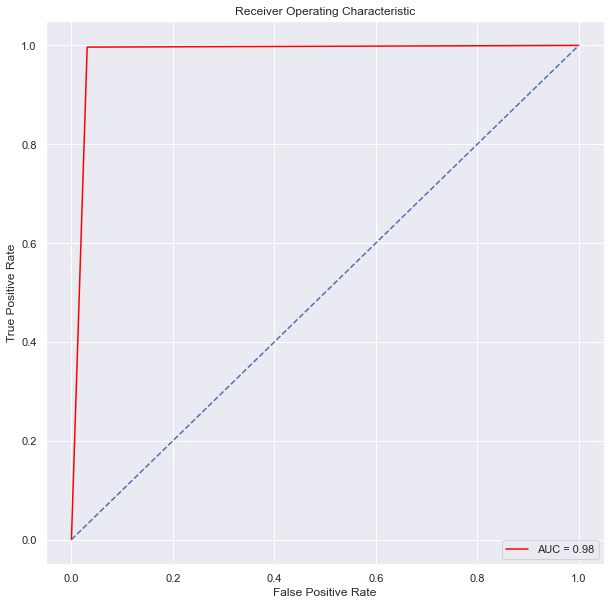

In [62]:
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, color='red', label='AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Plus la valeur de l'aire sous la courbe est proche de 1, meilleure est la capacit√© du mod√®le √† distinguer les classes. 
  
Dans ce cas, l'aire sous la courbe est de 0,98, ce qui indique que le mod√®le a de bonnes performances de pr√©diction en termes de sensibilit√© et de sp√©cificit√© pour distinguer les vrais positifs des faux positifs.

## - M√©thode des kmeans

In [63]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

Nous allons utiliser la m√©thode du coude et le coefficient de silhouette pour d√©terminer le nombre de cluster optimal.

In [66]:
#j'enl√®ve la derniere colonne
n_billets = X_test_with_predictions.drop(X_test_with_predictions.columns[6], axis=1)

#J'applique les differentes etapes pour centrer reduire les donnees
matrice = n_billets.values
X_scaled = scaler.fit_transform(matrice)
X_proj = pca.transform(X_scaled)


In [75]:
inertia = []
k_list = range(1, 10)

for i in k_list :
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(X_scaled) 
  inertia.append(kmeans.inertia_)

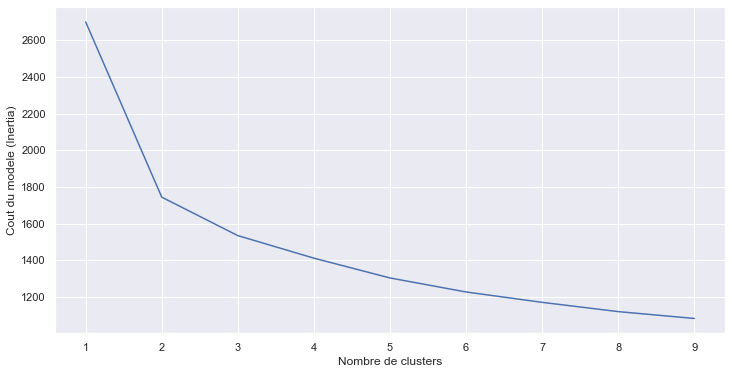

In [76]:
fig, ax = plt.subplots(1,1,figsize=(12,6))

ax.set_ylabel("Cout du modele (Inertia)")
ax.set_xlabel("Nombre de clusters")
ax = plt.plot(k_list, inertia)

COEFFICIENT DE SILHOUETTE

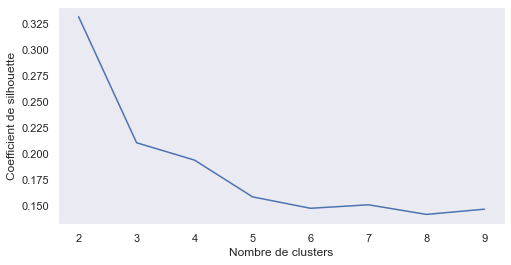

[0.3312187567973115,
 0.21058994539816042,
 0.19392138396183375,
 0.15876142568076326,
 0.14781473403900555,
 0.15115494551595912,
 0.1419477477461796,
 0.1469571736239135]

In [77]:
from sklearn.metrics import silhouette_score
tab_silhouette =[]
k_range=range(2,10)
for k in k_range:
    model=KMeans(n_clusters=k)
    cluster_labels=model.fit_predict(X_scaled)
    tab_silhouette.append(silhouette_score(X_scaled,cluster_labels))

fig = plt.figure(figsize=(8,4))
plt.plot(k_range,tab_silhouette)
plt.xlabel('Nombre de clusters')
plt.ylabel('Coefficient de silhouette')
plt.grid()
plt.show()
tab_silhouette

Le coefficient de silhouette nous donne 2 clusters avec le score le plus √©lev√©. De plus avec la m√©thode du coude nous voyons que la courbe se plit significativement a deux clusters. Nous allons donc partir sur 2 clusters pour notre modele.

In [64]:
X = billets[['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']]
y = billets['is_genuine']

# Diviser le dataset en ensembles d'entra√Ænement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entra√Æner le mod√®le KMeans sur les donn√©es d'entra√Ænement
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train)

# Pr√©dire les √©tiquettes pour les donn√©es de test
predictions = kmeans.predict(X_test)

Je souhaite ajouter maintenant les predictions a mon dataset. Dans le but de pouvoir projeter les predictions sur les deux plans factoriels par la suite.

In [65]:
# Ajouter les pr√©dictions √† X_test
X_test_with_predictions = X_test.copy()
X_test_with_predictions['Cluster_kmeans'] = predictions

# Afficher les premi√®res lignes du DataFrame avec la colonne des pr√©dictions
X_test_with_predictions.head()

diagonal  height_left  height_right  margin_low  margin_up  length  \
1116    172.26       103.90        104.12    4.990000       3.42  111.27   
1368    171.65       104.32        104.38    5.650000       3.24  112.30   
422     171.53       103.53        103.63    4.040000       2.96  112.76   
413     172.30       103.66        103.50    4.160539       3.16  112.95   
451     172.17       103.79        103.54    4.070000       2.78  113.03   

      Cluster_kmeans  
1116               1  
1368               1  
422                0  
413                0  
451                0

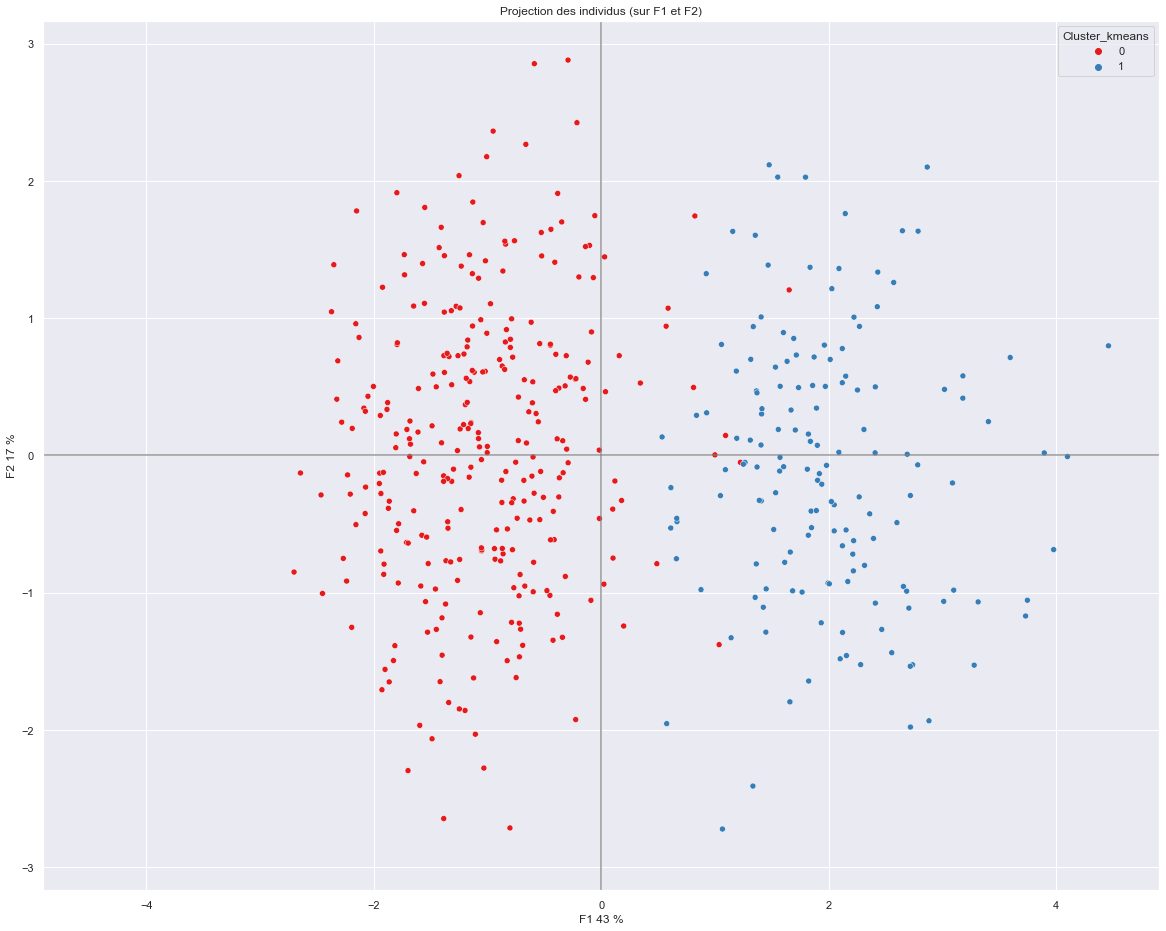

In [67]:
x_y = [0,1]
display_factorial_planes(X_proj, x_y, pca, labels=None, clusters=X_test_with_predictions['Cluster_kmeans'], figsize=(20,16), marker="o")

Avec cette projection on peut voir les deux groupes apparaitres comme vu plus haut. On voit aussi que les 0 correspondent au True et les 1 au False.

In [68]:
# Remplacer les 0 et 1 par True et False
bool_predictions = np.array([False if pred == 1 else True for pred in predictions])

confusion(y_test, bool_predictions)

pred_False  pred_True
test_False         154          7
test_True            0        289

Avec le modele des kmeans on obtient des resultats legerement moins bons, meme si superieurs au classificateur aleatoire.
  
Grace a la matrice de confusion on peut voir que le modele a fait 7 erreurs pour les False. Le faux positif est 7 (il a predit comme vrai alors que c'etait faux) et le faux negatif est de 0 (il a predit comme faux alors que c'etait vrai).  

Ces resultats sont donc moins bons que ceux obtenus avec la regression logistique.

Pour cette raison je vais donc choisir le modele de regression logistique. Il est comme on l'a vu le plus performant. Il me servira donc dans la creation de l'algorithme de prediction ci dessous.

## Partie 4 - Fonction pour tester nouveau fichier

In [69]:
import tkinter as tk
from tkinter import filedialog

def regression_logistique_():
    # Initialise une fen√™tre Tkinter cach√©e, probleme de compatibilite avec MacOs
    racine = tk.Tk()
    racine.withdraw()
    
    # Demande √† l'utilisateur de saisir le chemin d'acc√®s du fichier CSV
    chemin_acces = filedialog.askopenfilename(filetypes=[("Fichiers CSV", "*.csv")])
    
    # Charge le fichier CSV en utilisant Pandas
    df = pd.read_csv(chemin_acces)
    
    # S√©pare les donn√©es en entr√©es (X) et en sortie (y)
    X_analyse = df.drop(columns=['id'])
    
    # Ajoute une colonne pour les r√©sultats de la r√©gression au fichier CSV
    df['R√©sultats'] = estimator.predict(X_analyse)
    
    # Ajoute une colonne pour les scores de probabilit√© de la pr√©diction
    probabilites = estimator.predict_proba(X_analyse).round(2)
    df['Probabilit√© (%)'] = [max(prob) * 100 for prob in probabilites]
    
    # Enregistre le fichier CSV avec la colonne de r√©sultats
    df.to_csv(chemin_acces, index=False)
    
    print("La r√©gression logistique a √©t√© r√©alis√©e avec succ√®s. Le fichier CSV a √©t√© mis √† jour avec les r√©sultats.")
    
    # Retourne le DataFrame pour l'afficher
    return df

In [73]:
regression_logistique_()

La r√©gression logistique a √©t√© r√©alis√©e avec succ√®s. Le fichier CSV a √©t√© mis √† jour avec les r√©sultats.


diagonal  height_left  height_right  margin_low  margin_up  length   id  \
0    172.09       103.95        103.73        4.39       3.09  113.19  B_1   
1    171.52       104.17        104.03        5.27       3.16  111.82  B_2   
2    171.78       103.80        103.75        3.81       3.24  113.39  B_3   
3    172.02       104.08        103.99        5.57       3.30  111.10  B_4   
4    171.79       104.34        104.37        5.00       3.07  111.87  B_5   

   R√©sultats  Probabilit√© (%)  
0       True             99.0  
1      False             99.0  
2       True            100.0  
3      False            100.0  
4      False             98.0